We import the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
# Loading the data
df= pd.read_csv('planecrashinfo_20181121001952.csv')
df.head(2)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...


We see that we have "?" instead of NA's, let's remove them first

In [3]:
#we have to replace '?' with NaN
df.replace("?", np.nan, inplace = True)
df.head(2)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...


In [4]:
df.shape

(5783, 13)

In [5]:
#check for where all there are missing values
df.isnull().nunique()

date            1
time            2
location        2
operator        2
flight_no       2
route           2
ac_type         2
registration    2
cn_ln           2
aboard          1
fatalities      1
ground          2
summary         2
dtype: int64

We will extract the non-missing values and see which columns have the most missing values.

In [6]:
#plot to see which columns have most missing values
n = np.arange(13)
# x stores the data returned by isnull().value_counts() on each column
x = [[df.iloc[:,i].isnull().value_counts()]for i in range(13)]

#y stores only the "false" of the isnull().value_counts()
y = [x[i][0][0] for i in range(len(x))]
y.sort()

y

[1347, 3675, 4289, 4576, 5431, 5552, 5731, 5759, 5762, 5777, 5783, 5783, 5783]

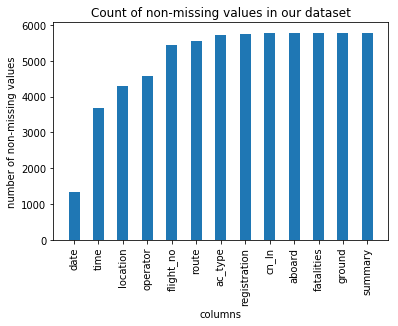

In [7]:
plt.bar(n, y, 0.45)
plt.title("Count of non-missing values in our dataset")
plt.xticks(n, df.columns, rotation =90)
plt.xlabel("columns")
plt.ylabel("number of non-missing values")
plt.show()

If we check the "aboard" columns, it still has "?" values, we shall replace the "?" using regex

In [8]:
df["aboard_numbers"] = df["aboard"].str[0:4].str.strip()
df["aboard_numbers"].str.replace("^\?", "?")
df["aboard_numbers"].replace("?", np.nan, inplace = True)
df["aboard_numbers"].isnull().value_counts()


False    5743
True       40
Name: aboard_numbers, dtype: int64

Now we will replace those remaining '?' with a NaN

In [9]:
df["aboard_numbers"].replace("?", np.nan, inplace = True)
df["aboard_numbers"] = pd.to_numeric(df["aboard_numbers"] )
df["aboard_numbers"].isnull().value_counts()

False    5743
True       40
Name: aboard_numbers, dtype: int64

In [10]:
df["fatalities"].head(5)

0     1   (passengers:1  crew:0)
1     1   (passengers:0  crew:0)
2     5   (passengers:0  crew:5)
3     1   (passengers:0  crew:1)
4    14   (passengers:?  crew:?)
Name: fatalities, dtype: object

We have to do the same thing for fatalities

In [11]:
# pd.Series(df.fatalities == '?').value_counts()#no '?'
df["fatalities"] = df["fatalities"].str[0:4].str.strip()
df["fatalities"].str.replace("^\?", "?")
df["fatalities"].replace("?", np.nan, inplace = True)
df["fatalities"] = pd.to_numeric(df["fatalities"] )



In [12]:
df["fatalities"].isnull().value_counts()

False    5772
True       11
Name: fatalities, dtype: int64

we can drop the NaN values as they are very few in number

In [13]:
df_operator = df[["aboard_numbers", "fatalities", "operator"]]

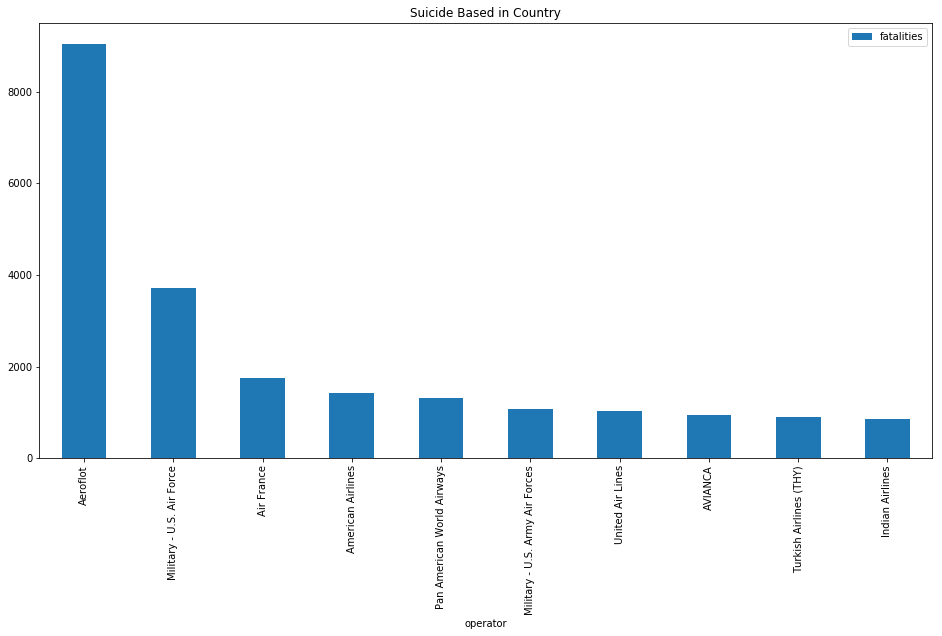

In [16]:
df_operator.groupby("operator")[["fatalities"]].sum().sort_values(by = "fatalities", ascending = False)[0:10].plot(kind='bar',figsize=(16,8),title='Suicide Based in Country')

In [87]:
# df.location.value_counts()

In [96]:
# df.groupby(["operator"])["fatalities"].value_counts(ascending = False)


In [28]:
#see how many are in flight_no and registration
# df.location.isnull().value_counts()
#df.registration.isnull().value_counts()

False    5777
True        6
Name: location, dtype: int64

In [76]:
df.shape

(5783, 13)

In [29]:
#we can drop the NaN values
df_nona = df.dropna()
df_nona.shape

(1202, 13)

In [32]:
df.aboard.isnull().value_counts()

False    5783
Name: aboard, dtype: int64

In [12]:
df['aboard_count'] = df["aboard"].str[0:4].str.strip()
df["aboard_count"] = pd.to_numeric(df["aboard_count"] )
# df["aboard_count"].isnull().value_counts()

In [15]:
# df["aboard_count"]

In [ ]:
df.groupby(['location', ])

In [10]:
# l1=df.summary.dropna().map(lambda x: True if "midair" in x else False  )


In [44]:
# pd.Series(df.fatalities.str[0] == '?').value_counts()

False    5772
True       11
Name: fatalities, dtype: int64